In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mpltex
#plt.style.use('plot_style.txt')
import seaborn as sns
%matplotlib inline
from gw_lens_dir.overlap_lensing_sie_twoimages import overlap_sie
from gw_lens_dir.L_unlensed import Lunlensed
pd.set_option('display.float_format', lambda x: '%.3e' % x)

#from pycbc.filter import match


/Users/saifali/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15)
plt.rcParams.update({'font.size': 14})
plt.rc('legend', fontsize=12) 

In [3]:
datadirName = "/Users/saifali/Desktop/gwlensing/SIE_glafic/data/"
plotdirName = "/Users/saifali/Desktop/gwlensing/plots/"

In [4]:
ein_rad_4 = 1.767909e-04
ein_rad_45 = 2.237510e-04
ein_rad_5 = 2.762358e-04
ein_rad_6 = 3.977795e-04

In [27]:
pd.read_csv(datadirName + "flux_fourimages_theta_0_sigma=6_sorted.csv")

,source_x,mu_1,mu_2,mu_3,mu_4,td_21,td_31,td_41,td_32,td_42,td_43,I_2,I_3,I_4
0,1.000e-05,6.544e+00,8.686e+00,-6.216e+00,-6.216e+00,9.803e-02,2.083e-01,2.083e-01,1.103e-01,1.103e-01,0.000e+00,1.327e+00,9.500e-01,9.500e-01
1,1.544e-05,6.153e+00,9.590e+00,-6.473e+00,-6.473e+00,1.514e-01,2.402e-01,2.402e-01,8.882e-02,8.882e-02,0.000e+00,1.559e+00,1.052e+00,1.052e+00
2,2.089e-05,5.813e+00,1.073e+01,-6.877e+00,-6.877e+00,2.048e-01,2.744e-01,2.744e-01,6.960e-02,6.960e-02,0.000e+00,1.846e+00,1.183e+00,1.183e+00
3,2.633e-05,5.516e+00,1.223e+01,-7.478e+00,-7.478e+00,2.582e-01,3.108e-01,3.108e-01,5.264e-02,5.264e-02,0.000e+00,2.217e+00,1.356e+00,1.356e+00
4,3.178e-05,5.253e+00,1.427e+01,-8.368e+00,-8.368e+00,3.115e-01,3.495e-01,3.495e-01,3.798e-02,3.798e-02,0.000e+00,2.717e+00,1.593e+00,1.593e+00
5,3.722e-05,5.019e+00,1.722e+01,-9.726e+00,-9.726e+00,3.649e-01,3.905e-01,3.905e-01,2.563e-02,2.563e-02,0.000e+00,3.430e+00,1.938e+00,1.938e+00
6,4.267e-05,4.809e+00,2.184e+01,-1.194e+01,-1.194e+01,4.183e-01,4.339e-01,4.339e-01,1.565e-02,1.565e-02,0.000e+00,4.541e+00,2.482e+00,2.482e+00
7,4.811e-05,4.621e+00,3.016e+01,-1.600e+01,-1.600e+01,4.716e-01,4.797e-01,4.797e-01,8.066e-03,8.066e-03,0.000e+00,6.527e+00,3.463e+00,3.463e+00
8,5.356e-05,4.450e+00,4.952e+01,-2.560e+01,-2.560e+01,5.250e-01,5.280e-01,5.280e-01,2.940e-03,2.940e-03,0.000e+00,1.113e+01,5.754e+00,5.754e+00
9,5.900e-05,4.294e+00,1.455e+02,-7.350e+01,-7.350e+01,5.784e-01,5.787e-01,5.787e-01,3.351e-04,3.351e-04,0.000e+00,3.388e+01,1.712e+01,1.712e+01


In [46]:
def df_edit(dirname = datadirName,
           datname = None):
       
    df = pd.read_csv(dirname + datname)
    df['source_x'] = df['source_x'] / ein_rad_6
    
    sigma_arr = np.linspace(2, 60, 500)
    df = df[['source_x', 'td_21', 'td_31', 'td_41', 'td_32', 'td_42', 'td_43']]
    
    sigma_min = [[0, 0, 0, 0, 0, 0] for i in range(df.shape[0])]
    sigma_max = [[0, 0, 0, 0, 0, 0] for i in range(df.shape[0])]
    
    td_21_arr = np.zeros_like(sigma_arr)
    td_31_arr = np.zeros_like(sigma_arr)
    td_41_arr = np.zeros_like(sigma_arr)
    td_32_arr = np.zeros_like(sigma_arr)
    td_42_arr = np.zeros_like(sigma_arr)
    td_43_arr = np.zeros_like(sigma_arr)
    
    for i in range(df.shape[0]):
        for j in range(len(sigma_arr)):
            td_21_arr[j] = ((sigma_arr[j] / 6) ** 4) * df.loc[i]['td_21']
            td_31_arr[j] = ((sigma_arr[j] / 6) ** 4) * df.loc[i]['td_31']
            td_41_arr[j] = ((sigma_arr[j] / 6) ** 4) * df.loc[i]['td_41']
            td_32_arr[j] = ((sigma_arr[j] / 6) ** 4) * df.loc[i]['td_32']
            td_42_arr[j] = ((sigma_arr[j] / 6) ** 4) * df.loc[i]['td_42']
            td_43_arr[j] = ((sigma_arr[j] / 6) ** 4) * df.loc[i]['td_43']
        
        sigma_min[i][0] = sigma_arr[td_21_arr < 0.05][-1]
        sigma_min[i][1] = sigma_arr[td_31_arr < 0.05][-1]
        sigma_min[i][2] = sigma_arr[td_41_arr < 0.05][-1]
        sigma_min[i][3] = sigma_arr[td_32_arr < 0.05][-1]
        sigma_min[i][4] = sigma_arr[td_42_arr < 0.05][-1]
        sigma_min[i][5] = sigma_arr[td_43_arr < 0.05][-1] 
        
        sigma_max[i][0] = sigma_arr[td_21_arr > 1.56][0]
        sigma_max[i][1] = sigma_arr[td_31_arr > 1.56][0]
        sigma_max[i][2] = sigma_arr[td_41_arr > 1.56][0]
        sigma_max[i][3] = sigma_arr[td_32_arr > 1.56][0]
        sigma_max[i][4] = sigma_arr[td_42_arr > 1.56][0]
        #sigma_max[i][5] = sigma_arr[td_43_arr > 1.56][0] # comment this for theta = 0
    
    '''
        # theta = 90 deg
    sigma_arr = np.linspace(2, 120, 500)
    df = df[['source_x', 'td_31', 'td_41', 'td_43']]
    sigma_min = [[0, 0, 0] for i in range(df.shape[0])]
    sigma_max = [[0, 0, 0] for i in range(df.shape[0])]
    
    td_31_arr = np.zeros_like(sigma_arr)
    td_41_arr = np.zeros_like(sigma_arr)
    td_43_arr = np.zeros_like(sigma_arr)
    
    for i in range(df.shape[0]):
        for j in range(len(sigma_arr)):
            td_31_arr[j] = ((sigma_arr[j] / 6) ** 4) * df.loc[i]['td_31']
            td_41_arr[j] = ((sigma_arr[j] / 6) ** 4) * df.loc[i]['td_41']
            td_43_arr[j] = ((sigma_arr[j] / 6) ** 4) * df.loc[i]['td_43']
        
        sigma_min[i][0] = sigma_arr[td_31_arr < 0.05][-1]
        sigma_min[i][1] = sigma_arr[td_41_arr < 0.05][-1]
        sigma_min[i][2] = sigma_arr[td_43_arr < 0.05][-1]
        
        
        sigma_max[i][0] = sigma_arr[td_31_arr > 1.56][0]
        sigma_max[i][1] = sigma_arr[td_41_arr > 1.56][0]
        sigma_max[i][2] = sigma_arr[td_43_arr > 1.56][0]
    
    '''

   
    return np.array(df['source_x']), np.array(sigma_min), np.array(sigma_max)

#df_edit(datname = "flux_fourimages_theta_45_sigma=6_sorted.csv")
y, sigma_min, sigma_max = df_edit(datname = "flux_fourimages_theta_0_sigma=6_sorted.csv")

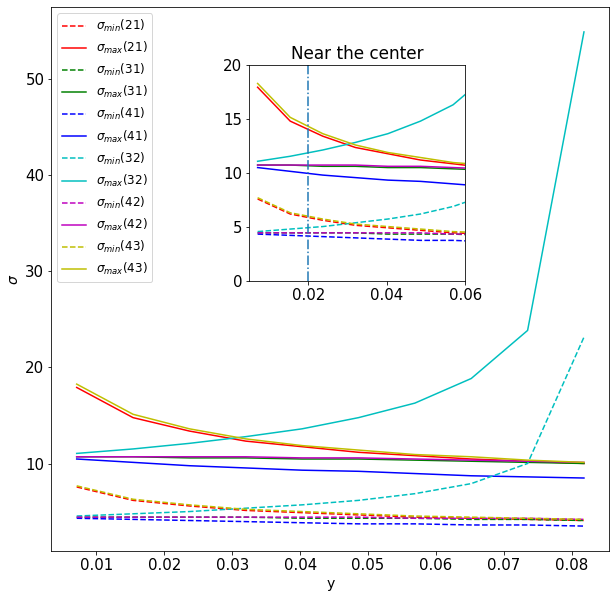

In [70]:
fig, ax1 = plt.subplots()
fig.set_size_inches([10,10])

color = ['r', 'g', 'b', 'c', 'm', 'y']
label = ['21', '31', '41', '32', '42', '43']

for i in range(len(label)):
    ax1.plot(y, sigma_min[:, i], '--', label = f'$\sigma_{{min}}$({label[i]})', color = color[i])
    ax1.plot(y, sigma_max[:, i], label = f'$\sigma_{{max}}$({label[i]})', color = color[i])
ax1.set_xlabel('y')
ax1.set_ylabel(r'$\sigma$')
ax1.legend()

left, bottom, width, height = [0.4, 0.5, 0.3, 0.3]
ax2 = fig.add_axes([left, bottom, width, height])
for i in range(len(label)):
    ax2.plot(y, sigma_min[:, i], '--', color = color[i])
    ax2.plot(y, sigma_max[:, i], color = color[i])

# theta = 0
# ax2.set_xlim(0.02, 0.1)
# ax2.set_ylim(-1, 15)
# ax2.axvline(0.05, ls = '-.')

# theta = 45 
ax2.set_xlim(0.005, 0.06)
ax2.set_ylim(0, 20)
ax2.axvline(0.02, ls = '-.')

ax2.set_title('Near the center')
#fig.savefig('timedelay-position.png', dpi = 300)

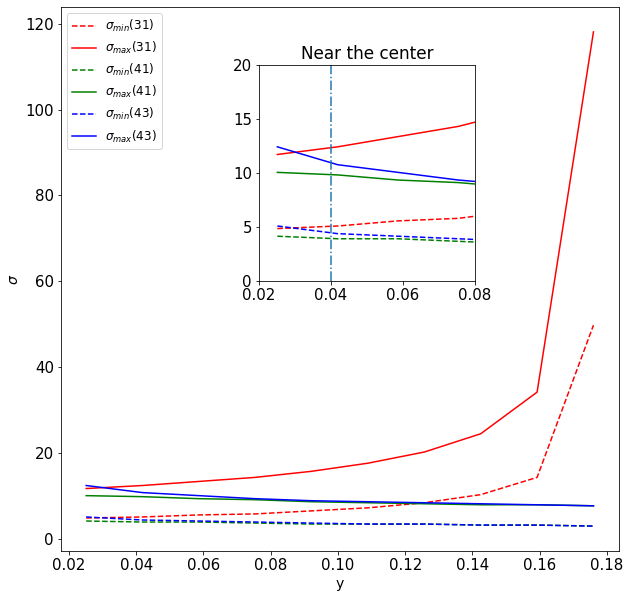

In [102]:
# for theta = 90 deg
fig, ax1 = plt.subplots()
fig.set_size_inches([10,10])

color = ['r', 'g', 'b']
label = ['31', '41', '43']

for i in range(len(label)):
    ax1.plot(y, sigma_min[:, i], '--', label = f'$\sigma_{{min}}$({label[i]})', color = color[i])
    ax1.plot(y, sigma_max[:, i], label = f'$\sigma_{{max}}$({label[i]})', color = color[i])
ax1.set_xlabel('y')
ax1.set_ylabel(r'$\sigma$')
ax1.legend()

left, bottom, width, height = [0.4, 0.5, 0.3, 0.3]
ax2 = fig.add_axes([left, bottom, width, height])
for i in range(len(label)):
    ax2.plot(y, sigma_min[:, i], '--', color = color[i])
    ax2.plot(y, sigma_max[:, i], color = color[i])

# theta = 90
ax2.set_xlim(0.02, 0.08)
ax2.set_ylim(0, 20)
ax2.axvline(0.04, ls = '-.')

ax2.set_title('Near the center')
fig.savefig('timedelay-position.png', dpi = 300)

In [49]:
df_fourimages_theta = pd.read_csv(datadirName + "flux_fourimages_y_0.08_sigma=6_sorted.csv")
df_fourimages_theta

,theta,mu_1,mu_2,mu_3,mu_4,td_21,td_31,td_41,td_32,td_42,td_43
0,0.000e+00,5.251e+00,1.429e+01,-8.377e+00,-8.377e+00,3.120e-01,3.498e-01,3.498e-01,3.787e-02,3.787e-02,0.000e+00
1,1.726e-01,5.279e+00,1.503e+01,-1.058e+01,-6.949e+00,3.059e-01,3.257e-01,3.691e-01,1.976e-02,6.316e-02,4.340e-02
2,3.453e-01,5.366e+00,1.759e+01,-1.420e+01,-5.972e+00,2.883e-01,2.969e-01,3.832e-01,8.559e-03,9.485e-02,8.629e-02
3,5.179e-01,5.516e+00,2.303e+01,-2.047e+01,-5.280e+00,2.609e-01,2.639e-01,3.920e-01,2.979e-03,1.311e-01,1.282e-01
4,6.905e-01,5.740e+00,3.055e+01,-2.871e+01,-4.781e+00,2.261e-01,2.272e-01,3.956e-01,1.115e-03,1.695e-01,1.684e-01
5,8.632e-01,6.056e+00,2.815e+01,-2.699e+01,-4.421e+00,1.864e-01,1.877e-01,3.939e-01,1.381e-03,2.075e-01,2.061e-01
6,1.036e+00,6.490e+00,1.980e+01,-1.932e+01,-4.165e+00,1.435e-01,1.476e-01,3.870e-01,4.057e-03,2.435e-01,2.394e-01
7,1.208e+00,7.085e+00,1.444e+01,-1.472e+01,-3.993e+00,9.850e-02,1.094e-01,3.751e-01,1.087e-02,2.766e-01,2.657e-01
8,1.381e+00,7.913e+00,1.132e+01,-1.254e+01,-3.892e+00,5.199e-02,7.549e-02,3.584e-01,2.350e-02,3.064e-01,2.829e-01
9,1.554e+00,9.098e+00,9.392e+00,-1.183e+01,-3.855e+00,4.697e-03,4.767e-02,3.372e-01,4.298e-02,3.325e-01,2.896e-01


In [177]:
def df_edit_theta(dirname = datadirName,
           datname = None):
       
    df = pd.read_csv(dirname + datname)
    
    sigma_arr = np.linspace(2, 60, 500)
    df = df[['theta', 'td_21', 'td_31', 'td_41', 'td_32', 'td_42', 'td_43']]
    
    sigma_min = [[0, 0, 0, 0, 0, 0] for i in range(df.shape[0])]
    sigma_max = [[0, 0, 0, 0, 0, 0] for i in range(df.shape[0])]
    
    td_21_arr = np.zeros_like(sigma_arr)
    td_31_arr = np.zeros_like(sigma_arr)
    td_41_arr = np.zeros_like(sigma_arr)
    td_32_arr = np.zeros_like(sigma_arr)
    td_42_arr = np.zeros_like(sigma_arr)
    td_43_arr = np.zeros_like(sigma_arr)
    
    for i in range(df.shape[0]):
        for j in range(len(sigma_arr)):
            td_21_arr[j] = ((sigma_arr[j] / 6) ** 4) * df.loc[i]['td_21']
            td_31_arr[j] = ((sigma_arr[j] / 6) ** 4) * df.loc[i]['td_31']
            td_41_arr[j] = ((sigma_arr[j] / 6) ** 4) * df.loc[i]['td_41']
            td_32_arr[j] = ((sigma_arr[j] / 6) ** 4) * df.loc[i]['td_32']
            td_42_arr[j] = ((sigma_arr[j] / 6) ** 4) * df.loc[i]['td_42']
            td_43_arr[j] = ((sigma_arr[j] / 6) ** 4) * df.loc[i]['td_43']
        
        sigma_min[i][0] = sigma_arr[td_21_arr < 0.05][-1]
        sigma_min[i][1] = sigma_arr[td_31_arr < 0.05][-1]
        sigma_min[i][2] = sigma_arr[td_41_arr < 0.05][-1]
        sigma_min[i][3] = sigma_arr[td_32_arr < 0.05][-1]
        sigma_min[i][4] = sigma_arr[td_42_arr < 0.05][-1]
        sigma_min[i][5] = sigma_arr[td_43_arr < 0.05][-1] 
        
        
        sigma_max[i][0] = sigma_arr[td_21_arr > 1.56][0]
        sigma_max[i][1] = sigma_arr[td_31_arr > 1.56][0]
        sigma_max[i][2] = sigma_arr[td_41_arr > 1.56][0]
        sigma_max[i][3] = sigma_arr[td_32_arr > 1.56][0]
        sigma_max[i][4] = sigma_arr[td_42_arr > 1.56][0]
        sigma_max[i][5] = sigma_arr[td_43_arr > 1.56][0]
        
    return np.array(df['theta']), np.array(sigma_min), np.array(sigma_max)

#df_edit_theta(datname = "flux_fourimages_y_0.08_sigma=6_sorted.csv")
#ellip, sigma_min, sigma_max = df_edit_theta(datname = "flux_fourimages_y_0.02_theta_45_sigma=6_sorted.csv")

Text(0.5, 1.0, 'y = 0.08')

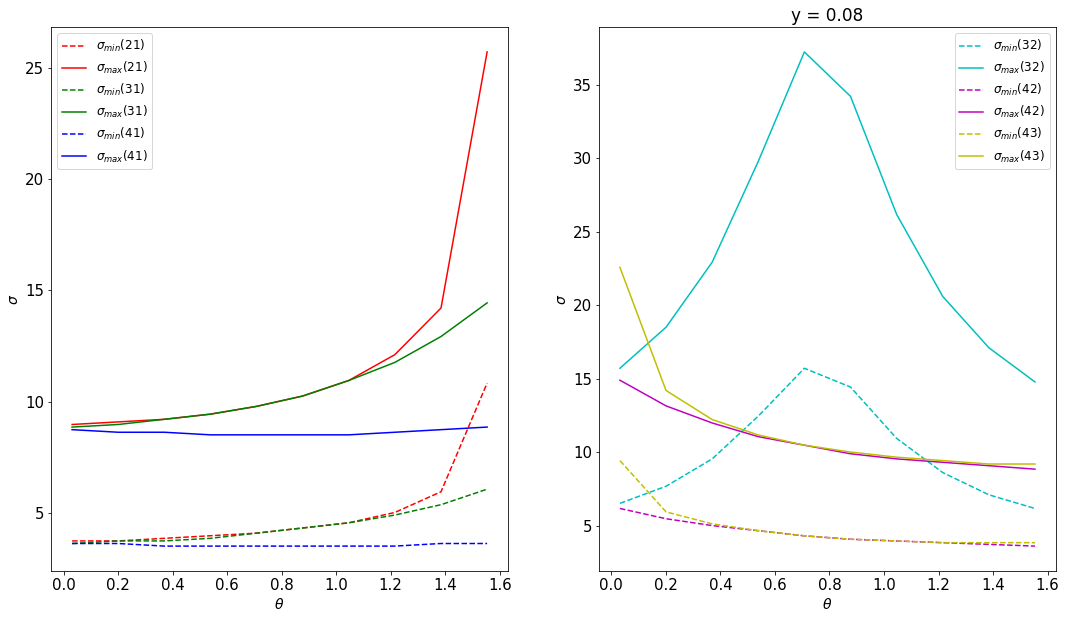

In [182]:
theta, sigma_min, sigma_max = df_edit_theta(datname =  "flux_fourimages_y_0.08_sigma=6_sorted.csv")

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches([18,10])

color = ['r', 'g', 'b', 'c', 'm', 'y']
label = ['21', '31', '41', '32', '42', '43']

for i in range(len(label) - 3):
    ax1.plot(theta, sigma_min[:, i], '--', label = f'$\sigma_{{min}}$({label[i]})', color = color[i])
    ax1.plot(theta, sigma_max[:, i], label = f'$\sigma_{{max}}$({label[i]})', color = color[i])
ax1.set_xlabel(r'$\theta$')
ax1.set_ylabel(r'$\sigma$')
ax1.legend()

for i in range(len(label)-3, len(label)):
    ax2.plot(theta, sigma_min[:, i], '--', label = f'$\sigma_{{min}}$({label[i]})', color = color[i])
    ax2.plot(theta, sigma_max[:, i], label = f'$\sigma_{{max}}$({label[i]})', color = color[i])
ax2.set_xlabel(r'$\theta$')
ax2.set_ylabel(r'$\sigma$')
ax2.legend()

plt.title('y = 0.08')

In [179]:
df_ellip_theta_45 = pd.read_csv(datadirName + "flux_fourimages_y_0.02_theta_45_sigma=6_sorted.csv")

In [102]:
df_ellip_theta_0 = pd.read_csv(datadirName + "flux_fourimages_y_0.02_theta_0_sigma=6_sorted.csv")

Text(0, 0.5, '$\\Delta td$')

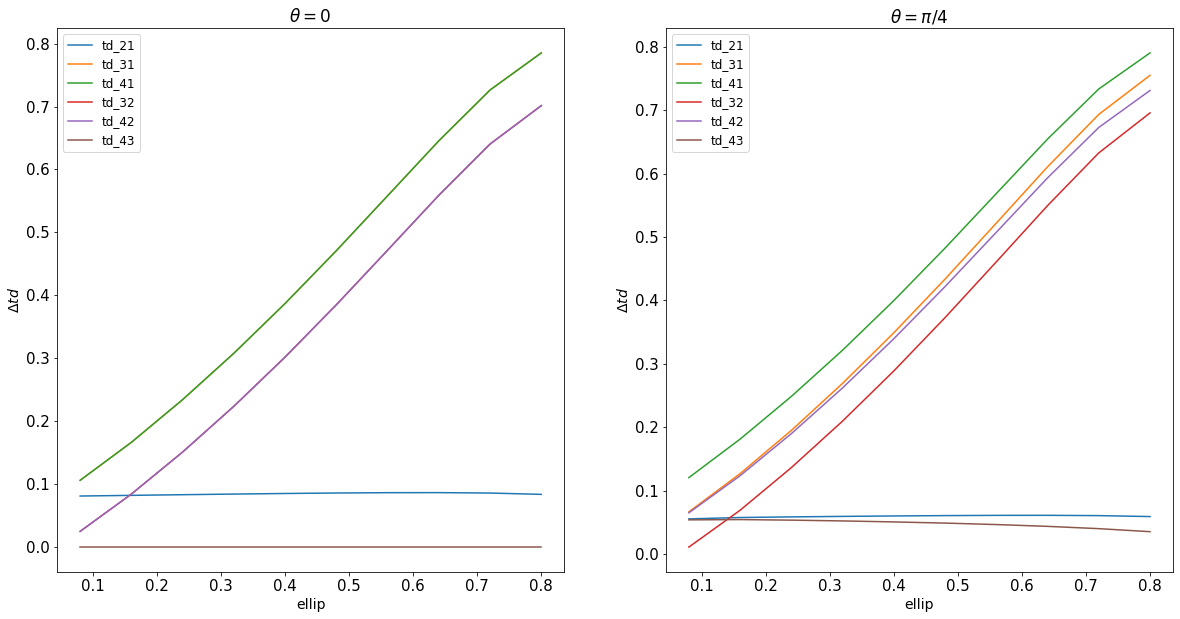

In [138]:
fig, axes = plt.subplots(nrows=1, ncols=2)
df_ellip_theta_0.plot(x = 'ellip', y = ['td_21', 'td_31', 'td_41', 'td_32', 'td_42', 'td_43'], figsize=(20,10), ax = axes[0])
axes[0].set_title(r'$\theta = 0$')
axes[0].set_ylabel(r'$\Delta td$')
df_ellip_theta_45.plot(x = 'ellip', y = ['td_21', 'td_31', 'td_41', 'td_32', 'td_42', 'td_43'], figsize=(20,10), ax = axes[1]) 
axes[1].set_title(r'$\theta = \pi/4$')
axes[1].set_ylabel(r'$\Delta td$')

In [173]:
ellip, sigma_min, sigma_max = df_edit_theta(datname = "flux_fourimages_y_0.02_theta_45_sigma=6_sorted.csv")

Text(0.5, 1.0, 'y = 0.02, $\\theta = \\pi/4$')

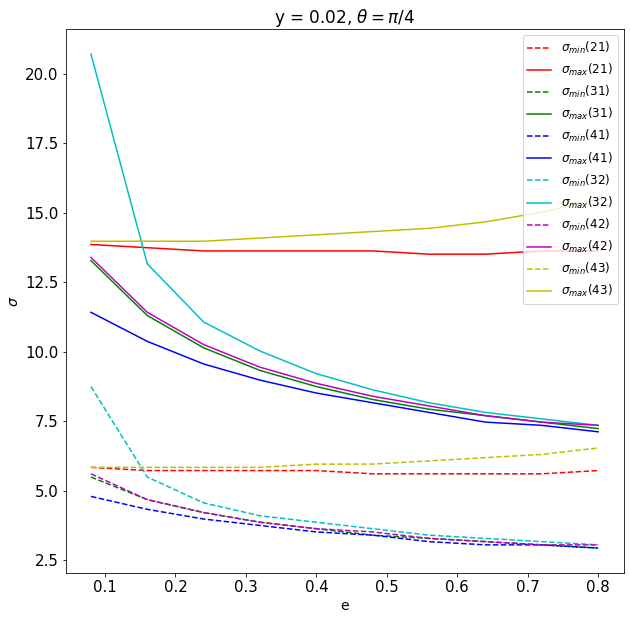

In [175]:
fig, ax1 = plt.subplots()
fig.set_size_inches([10, 10])

color = ['r', 'g', 'b', 'c', 'm', 'y']
label = ['21', '31', '41', '32', '42', '43']

for i in range(len(label)):
    ax1.plot(ellip, sigma_min[:, i], '--', label = f'$\sigma_{{min}}$({label[i]})', color = color[i])
    ax1.plot(ellip, sigma_max[:, i], label = f'$\sigma_{{max}}$({label[i]})', color = color[i])
ax1.set_xlabel(r'e')
ax1.set_ylabel(r'$\sigma$')
ax1.legend()
ax1.set_title(r'y = 0.02, $\theta = \pi/4$')